In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
def explore_video(file_path):
    sucess = True
    explorer = {
        'equal_channels': True,
        'diff_frames': [],
        'shape': None,
        'qtd_frames': 0,
        'sample': None
    }

    cap = cv2.VideoCapture(file_path)
    while True:
        sucess, frame = cap.read()
        if sucess == False:
            break

        explorer['qtd_frames'] += 1
        if explorer['shape'] is None:
            explorer['shape'] = frame.shape
            explorer['sample'] = frame
        explorer['equal_channels'] = explorer['equal_channels'] and \
            (frame[:,:,0] == frame[:,:,1]).all() and (frame[:,:,0] == frame[:,:,2]).all()
        if ((frame[:,:,0] == frame[:,:,1]).all() and (frame[:,:,0] == frame[:,:,2]).all()) == False:
            explorer['diff_frames'].append(frame)
    cap.release()

    print('Name:', file_path)
    print("qtd_frames:", explorer['qtd_frames'])
    print("shape:", explorer['shape'])
    print("equal channels:", explorer['equal_channels'])
    print('Qtd. diff frames:', len(explorer['diff_frames']))

    fig, ax = plt.subplots()

    ax.imshow(explorer['sample'], # [:,:,0]
            #   cmap="jet",
            )
    ax.set_title(file_path.split(os.sep)[-1])
    ax.set_axis_off()
    plt.show()

    print('=' * 30, '\n')

    return explorer

In [ ]:
file_path = os.path.join("..", "videoFolder", "left_eye.avi")
explorer_leye = explore_video(file_path)

file_path = os.path.join("..", "videoFolder", "right_eye.avi")
explorer_reye = explore_video(file_path)

file_path = os.path.join("..", "videoFolder", "bottom_face.avi")
explorer_mouth = explore_video(file_path)

In [1]:
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from scipy.io import loadmat
from ppg_analyzer import *
import heartpy as hp
import numpy as np

/home/desafio01/anaconda3/envs/pipeline/lib/python3.6/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


3


/home/desafio01/anaconda3/envs/pipeline/lib/python3.6/site-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/desafio01/anaconda3/envs/pipeline/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/desafio01/anaconda3/envs/pipeline/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/desafio01/anaconda3/envs/pipeline/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


1
0


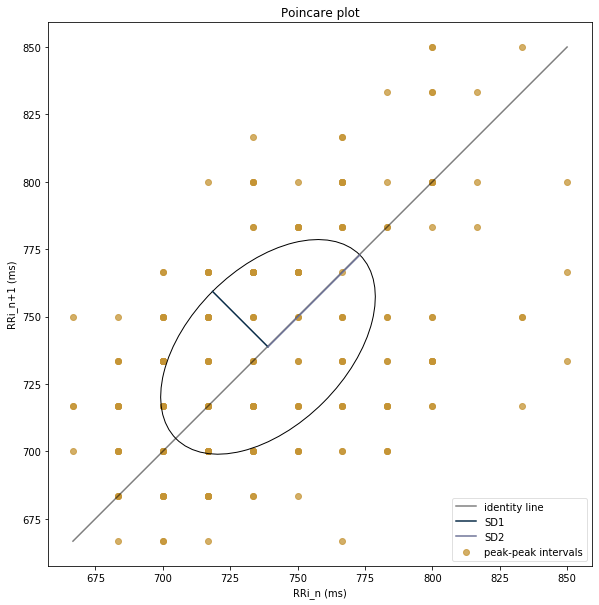

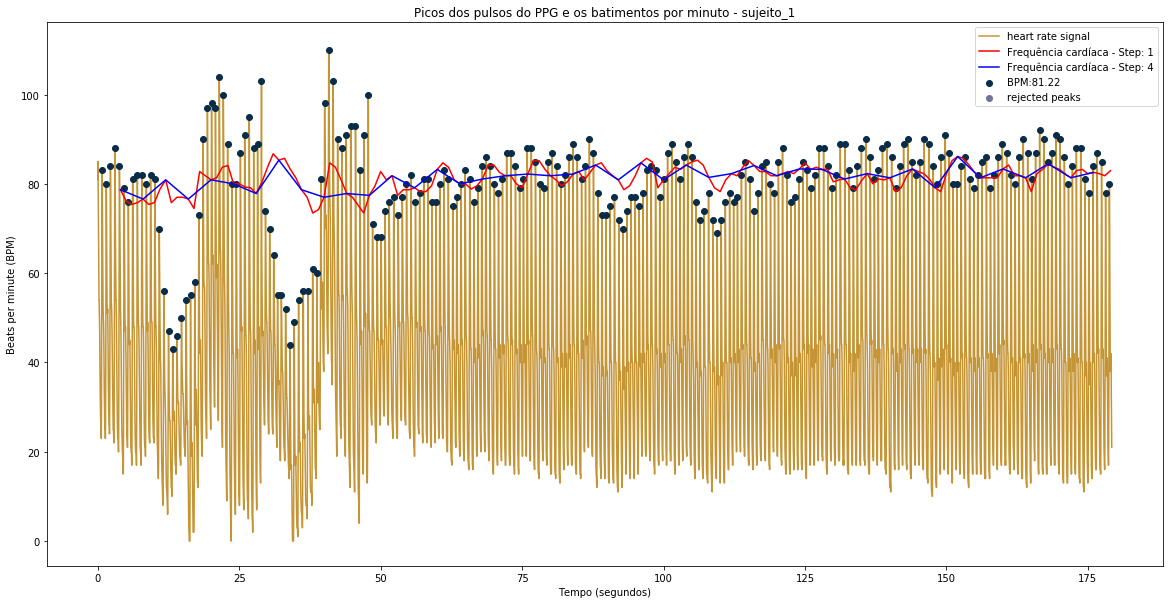

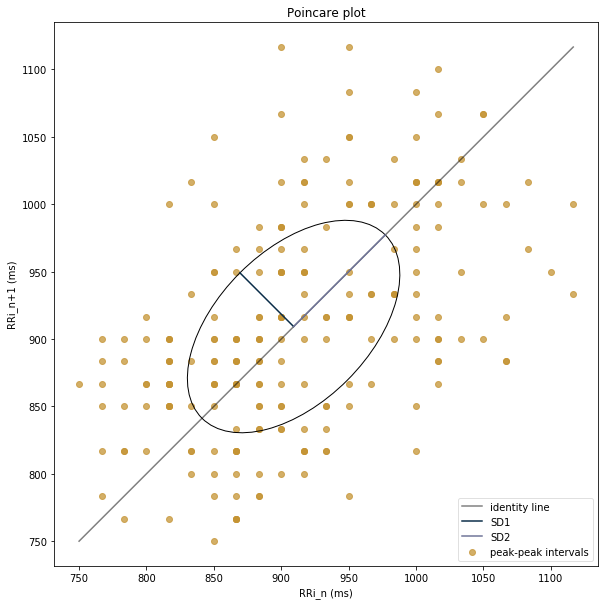

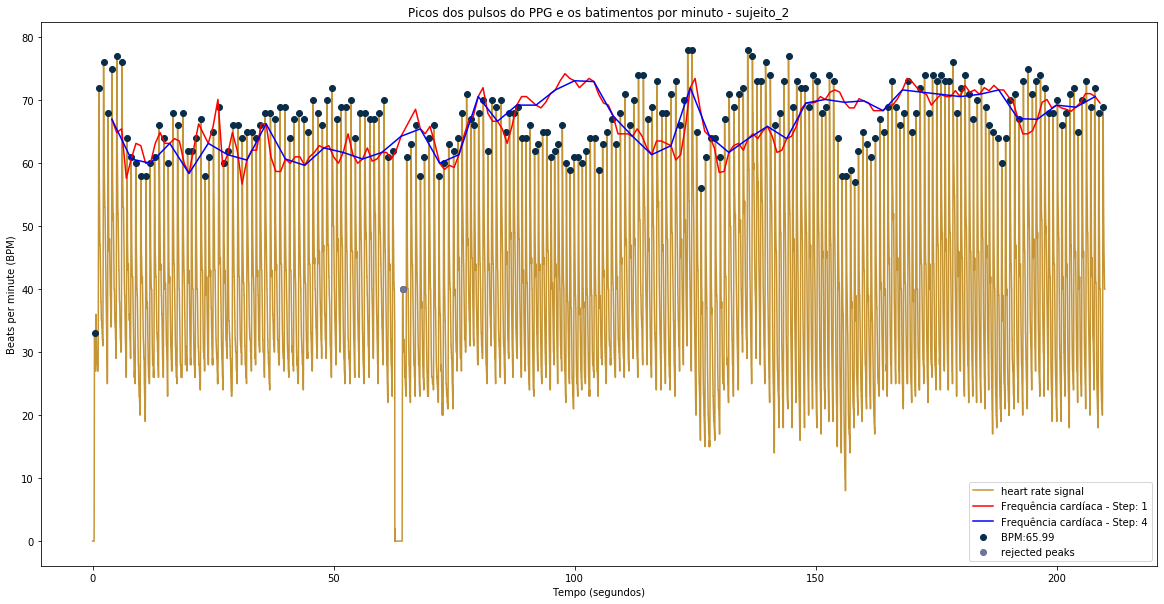

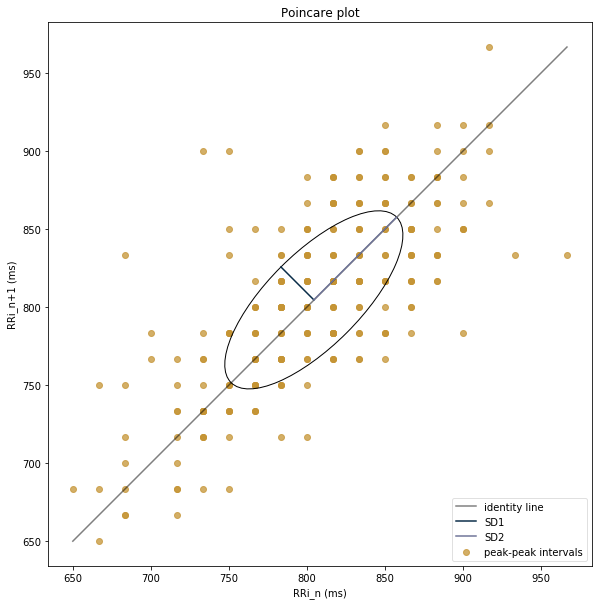

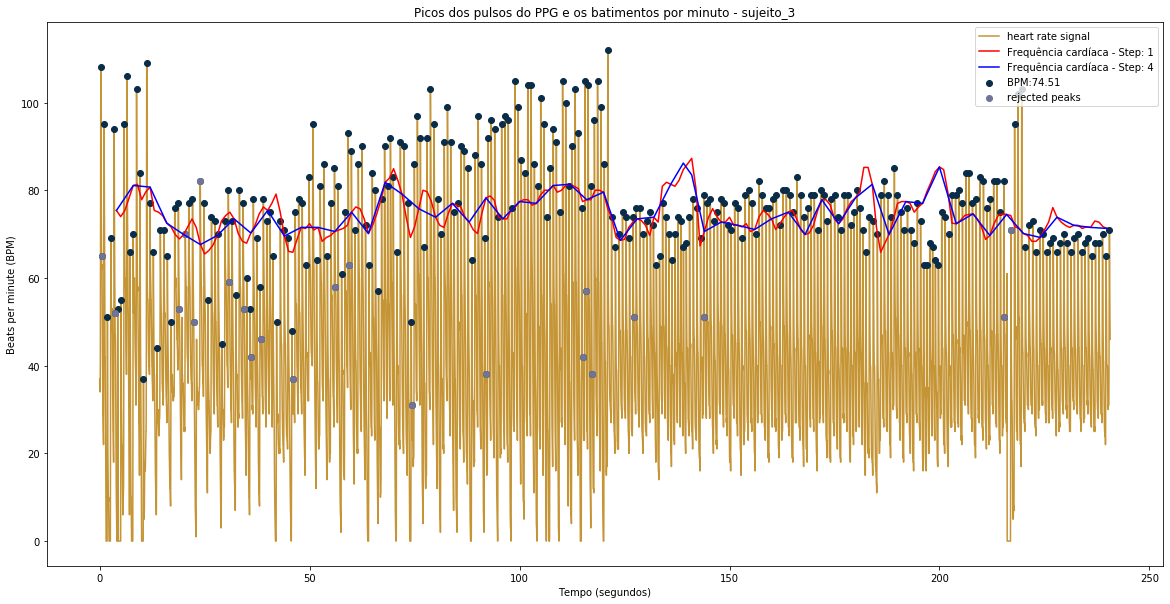

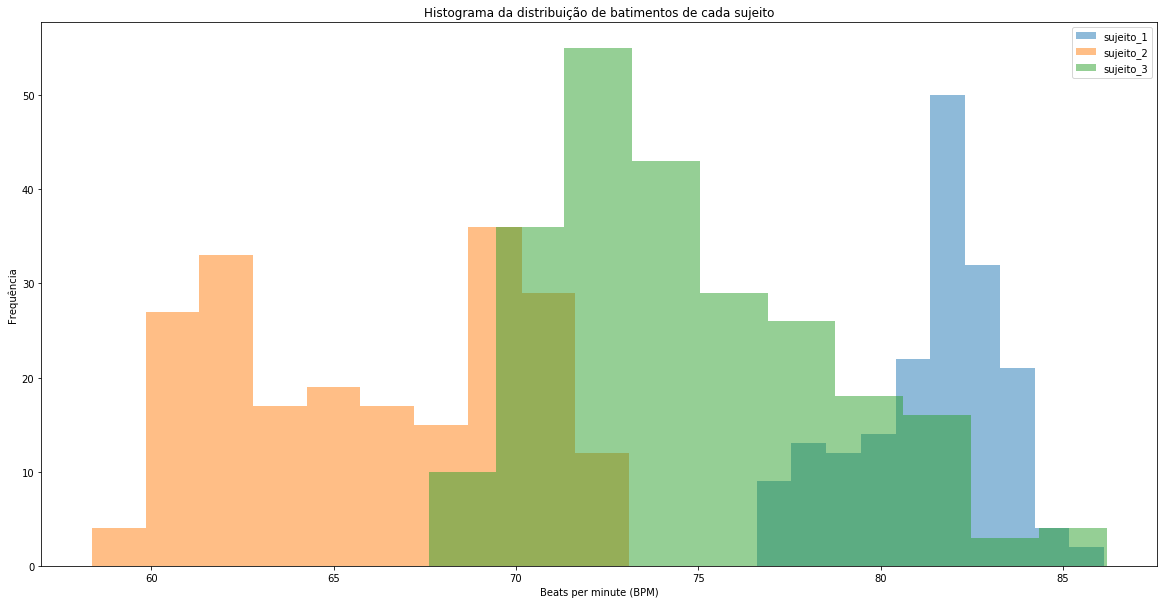

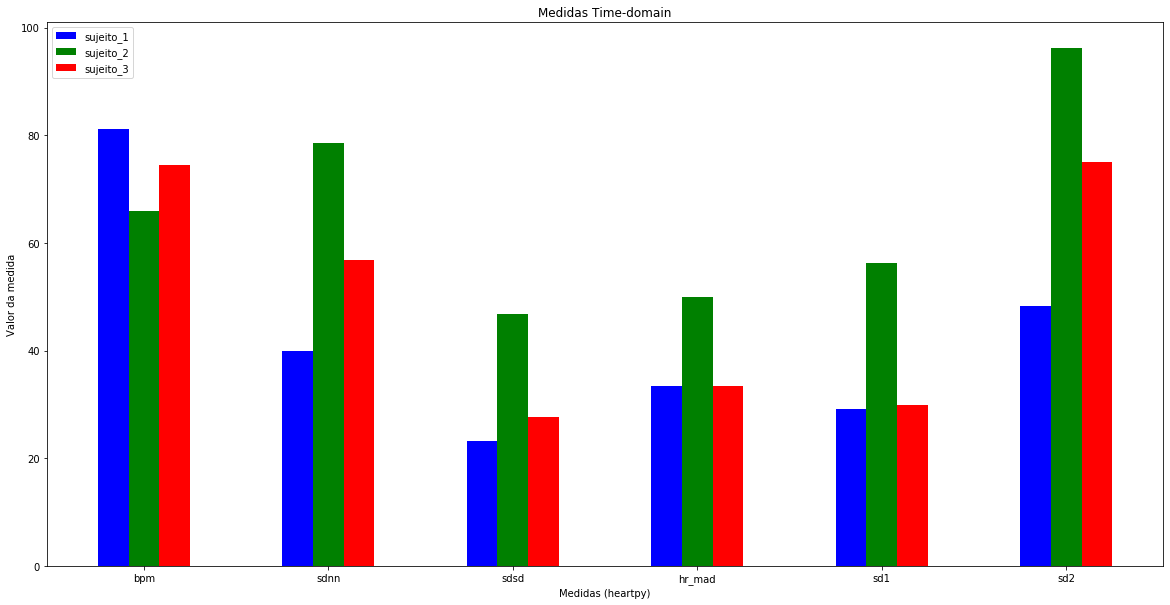

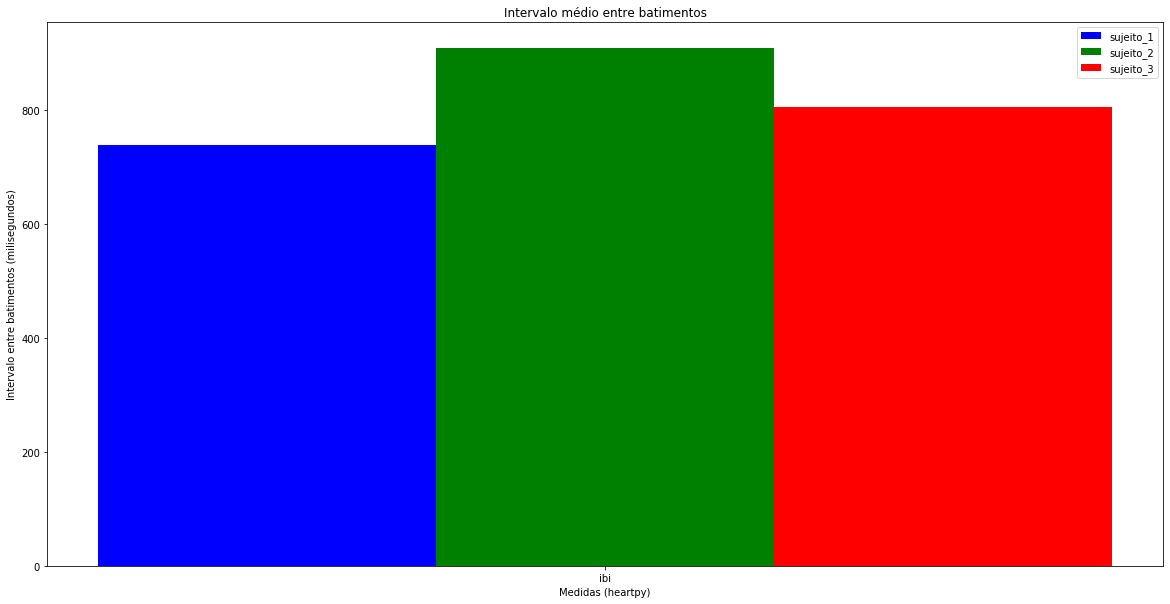

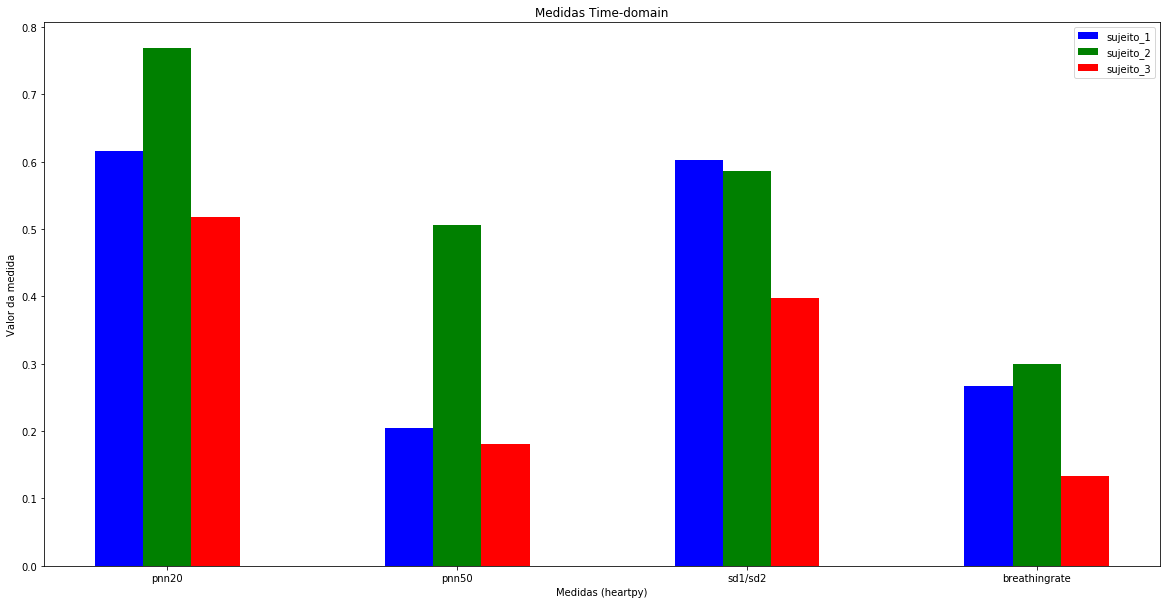

In [2]:
explore_ppg('/home/desafio01/Documents/Codes/bio_hmd/Dataset_MR_NIRP/dataset_out') # '/home/victorrocha/scratch/desafio2_2021/Datasets/artificial_v1'

In [1]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import heartpy as hp
from scipy.interpolate import interp1d

mat = loadmat('/home/victorrocha/scratch/desafio2_2021/Datasets/artificial_v1/Subject6_still_940/pulseOx.mat')

ppg = mat['pulseOxRecord'][0]

# values = np.array([int(np.mean(value[0])) for value in pulse[0]])

# ppg = np.array([int(value) for array in pulse[0] for value in array[0]])

# wd, m = hp.process(ppg, sample_rate = 60.0)
step = 4
if step == 1:
    wd, m = hp.process_segmentwise(ppg, sample_rate = 60.0, segment_width=4, segment_overlap=.75)
elif step == 4:
    wd, m = hp.process_segmentwise(ppg, sample_rate = 60.0, segment_width=4)

# [array.ravel() for array in pulse.ravel()]
# np.all(np.concatenate([x.ravel() for x in pulse.ravel()]) == ppg)

/home/victorrocha/.conda/envs/pipeline/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/victorrocha/.conda/envs/pipeline/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/victorrocha/.conda/envs/pipeline/lib/python3.6/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/victorrocha/.conda/envs/pipeline/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


In [ ]:
data_inter = interpolate_grow(m['bpm'].copy(), step=step)

plt.figure(figsize=(20, 10))
plt.plot(np.arange(start=step, stop=len(data_inter)+step), data_inter, color='r', marker='X', markersize=10, linewidth=0, label=f'Frequência cardíaca com interpolação - lenght: {len(data_inter)}')

plt.plot(np.arange(start=step, stop=len(m['bpm'])*step+1, step=step), m['bpm'], color='b', marker='o', label=f'Frequência cardíaca sem interpolação - lenght: {len(m["bpm"])}')
plt.title('Exemplo de interpolação para crescer a série de batimentos cardíacos')
plt.legend()
plt.ylim(40,100)
plt.show()

In [ ]:
data_inter = interpolate_nan(m['bpm'].copy())
# data_inter = interpolate_outliers(data_inter, step=step)
print(np.where(np.isnan(data_inter)))
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(data_inter)), data_inter, color='r', marker='X', markersize=10, linewidth=1, label=f'Frequência cardíaca com interpolação - lenght: {len(data_inter)}')

# plt.plot(np.arange(start=0, stop=len(m['bpm'])*step, step=step), m['bpm'], color='b', marker='o', label=f'Frequência cardíaca sem interpolação - lenght: {len(m["bpm"])}')
plt.title('Exemplo de interpolação para crescer a série de batimentos cardíacos e remover outliers')
plt.legend()
# plt.ylim(40,100)
plt.show()

In [1]:
from matplotlib import pyplot as plt
from scipy.io import loadmat
import numpy as np

def plot_multivalued(ppg_path):
    mat = loadmat(ppg_path)

    ppg = mat['pulseOxRecord'][0]
    
    # ppg_fixed = np.concatenate([array.ravel() for array in ppg.ravel()])
    
    # values = np.array([int(np.mean(value)) for value in ppg])

    index_compensate = 0

    for index, value in enumerate(ppg):
        if value.shape != (1, 1):
            space = 50

            ppg_fixed = np.concatenate([array.ravel() for array in ppg[index-10:index+space].ravel()])
    
            values = np.array([int(np.mean(value)) for value in ppg[index-space:index+space]])
            
            plt.figure(figsize=(20, 10))
            # ppg without multivalued fields # ppg_fixed[index+index_compensate-10:index+index_compensate+space]
            plt.plot(np.arange(space-10, space*2), ppg_fixed, color='r', label='ppg without multivalued fields')
            # ppg with multivalued fields # [index-space:index+space]
            plt.plot(np.arange(space*2), values, color='b', label='ppg with multivalued fields')
            plt.legend()
            plt.show()
            index_compensate += len(value[0]) - 1

ValueError: x and y must have same first dimension, but have shapes (60,) and (93,)

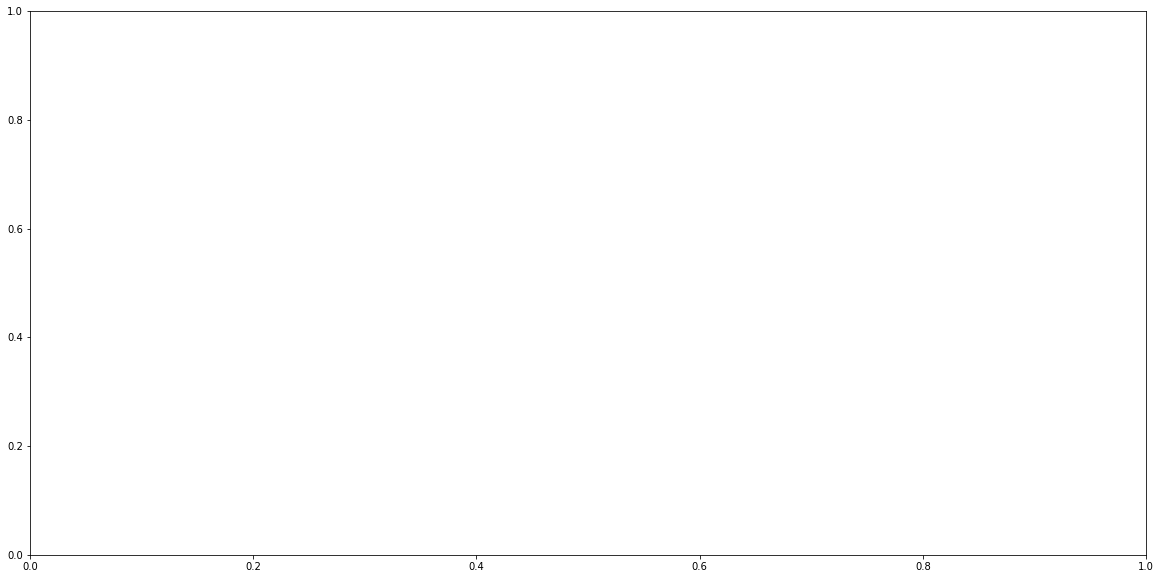

In [2]:
plot_multivalued('/home/desafio01/Documents/Codes/bio_hmd/Dataset_MR_NIRP/dataset_teste/sujeito_1/PulseOX/pulseOx.mat')

In [ ]:
# len(pulse[0][5867][0]) + len(pulse[0][5868][0]) + len(pulse[0][8510][0])
# [index for index, value in enumerate(ppg) if value == 0]
# ppg[ppg == 0] # [8545-2:8545-2+50]
# len(mat['pulseOxTime'][0])

In [ ]:
from scipy.interpolate import interp1d
import heartpy as hp
# data = ppg[2065-100:2065+100].copy()
data = ppg.copy()

# f2 = interp1d(x=np.arange(len(ppg[2065-1000:2065+1000])), y=ppg[2065-1000:2065+1000], kind='cubic')

# xnew = np.linspace(min(data), max(data), num=90, endpoint=True)

# idx = np.nonzero(data)[0]
# # idx = np.where(data > 5)[0]
# idx = np.concatenate([idx[idx < 75], idx[idx > 110]])
# x = np.arange(len(data))

# interp = interp1d(x[idx], data[idx], kind='cubic', bounds_error=False) #fill_value="extrapolate") # , kind='cubic'

# data_inter = interp(x)

# data_inter = hp.enhance_peaks(data, iterations=1) # hp.preprocessing.interpolate_clipping(data, sample_rate=60)
# data_inter = hp.filtering.smooth_signal(data, sample_rate=60)

#Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.
data_inter = hp.filter_signal(data, [0.7, 4.], sample_rate=60, 
                            order=3, filtertype='bandpass')

plt.figure(figsize=(20, 10))
# plt.plot(np.arange(50, 100), ppg[8543:8543+50], color='b') # 5867+5:5867+50
plt.plot(data_inter[2065-2000:2065+2000], color='r') # 5867+5:5867+50
plt.plot(data[2065-2000:2065+2000], color='g') # 5867+5:5867+50
plt.show()

In [ ]:
from typing import Union, List, Tuple
def heart_rate(
    x: Union[List, np.ndarray], sfreq: int = 1000, unit: str = "rr", kind: str = "cubic"
) -> Tuple[np.ndarray, np.ndarray]:
    """Transform peaks data into heart rate time series.
    Parameters
    ----------
    x : np.ndarray or list
        Boolean vector of peaks detection.
    sfreq : int
        Sampling frequency.
    unit : str
        The heartrate unit in use. Can be 'rr' (R-R intervals, in ms)
        or 'bpm' (beats per minutes). Default is 'rr'.
    kind : str
        The method to use (parameter of `scipy.interpolate.interp1d`).
    Returns
    -------
    heartrate : np.ndarray
        The heart rate frequency.
    time : np.ndarray
        Time array.
    Notes
    -----
    The input should be in the form of a boolean vector encoding the position
    of the peaks. The time and heart rate output will have the same
    length. Values before the first peak and after the last peak will be filled
    with NaN values.
    """
    if isinstance(x, list):
        x = np.asarray(x)
    if not ((x == 1) | (x == 0)).all():
        raise ValueError("Input vector should only contain 0 and 1")

    # Find peak indices
    peaks_idx = np.where(x)[0]

    # Create time vector (seconds):
    time = (peaks_idx / sfreq)[1:]

    rr = np.diff(peaks_idx)

    # R-R heartratevals (in miliseconds)
    heartrate = (rr / sfreq) * 1000
    if unit == "bpm":
        # Beats per minutes
        heartrate = 60000 / heartrate

    # Use the peaks vector as time input
    new_time = np.arange(0, len(x) / sfreq, 1 / sfreq)

    if kind is not None:
        # Interpolate
        f = interp1d(
            time, heartrate, kind=kind, bounds_error=False, fill_value=(np.nan, np.nan)
        )
        heartrate = f(new_time)

    return heartrate, new_time

In [ ]:
print(wd.keys())
plt.plot(wd['hr'])
peak_mask = np.zeros_like(wd['hr'])
peak_mask[wd['peaklist']] = 1
out = heart_rate(peak_mask, sfreq=60, unit='bpm', kind=None)
plt.plot(out[0])
plt.show()

In [ ]:
len(out[0]), len(wd['peaklist'])